# Iris Flower Classification using Machine Learning

# Importing necessary libraries

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

# 1. Load the dataset

In [25]:
data = pd.read_csv(r"C:\Users\Sneha\OneDrive\Desktop\VS CODE\DATA ANALYSIS\CodSoft Internship\IRIS FLOWER\IRIS.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
# Using sklearn's built-in Iris dataset for demonstration
from sklearn.datasets import load_iris
iris = load_iris()

In [27]:
# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [28]:
#  Display basic information about the dataset
print("Dataset Overview:")
print(data.head())

Dataset Overview:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [29]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [30]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


# 2. Exploratory Data Analysis (EDA)

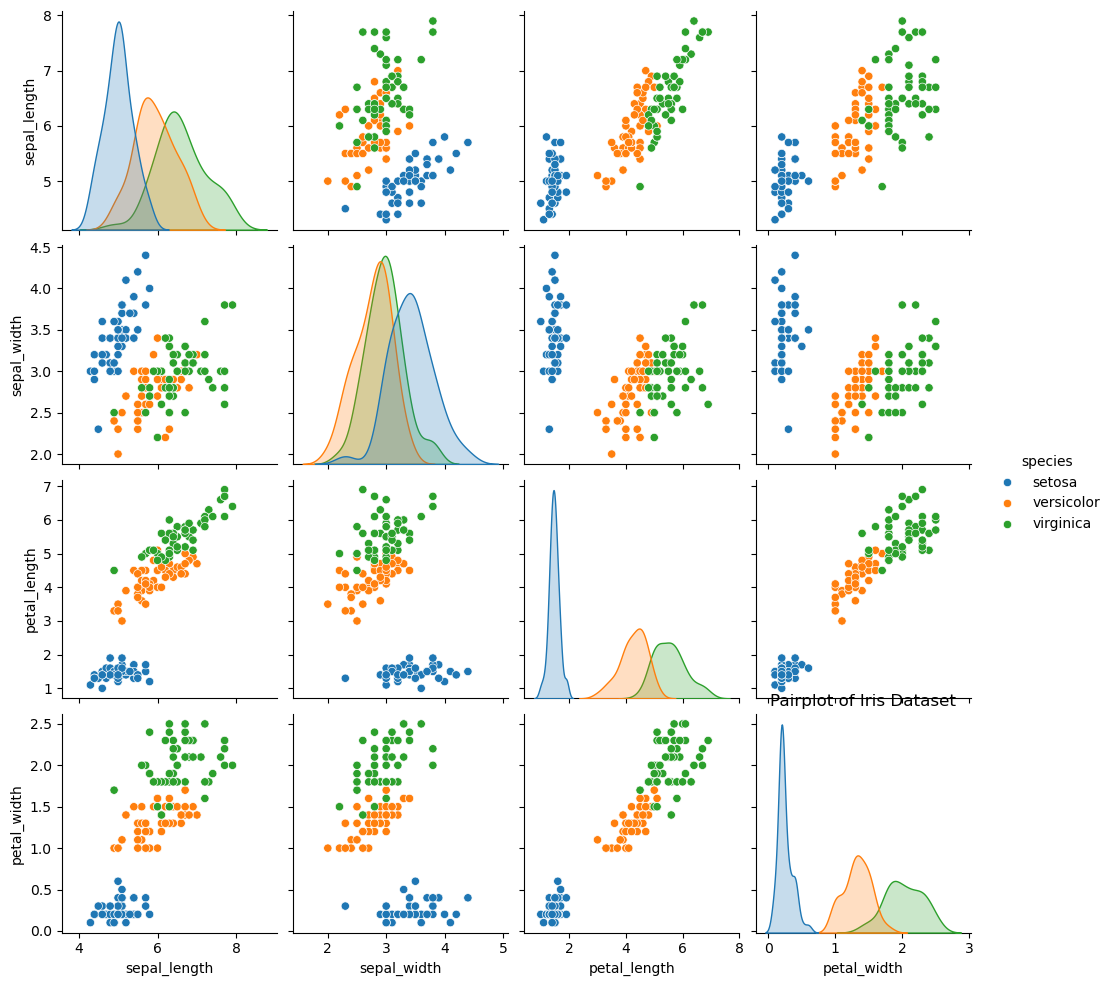

In [31]:
# Pairplot for feature relationships
sns.pairplot(df, hue='species')
plt.title('Pairplot of Iris Dataset')
plt.show()

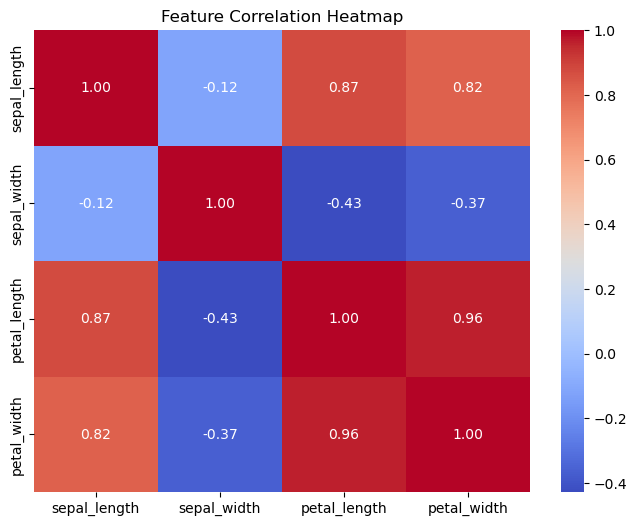

In [32]:
# Heatmap for feature correlations
plt.figure(figsize=(8, 6))
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

# 3. Data Preprocessing

In [33]:
# Separate features and target variable
X = df.drop('species', axis=1)
y = df['species']

In [34]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 4. Train the Model

In [36]:
# Using Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 5. Evaluate the Model

In [37]:
# Predictions
y_pred = model.predict(X_test)

In [38]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [39]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


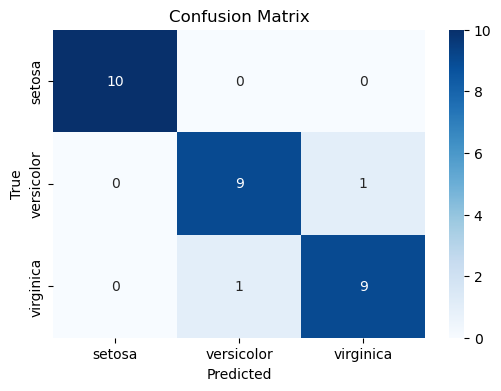

In [40]:
# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [41]:
# Accuracy Score
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Model Accuracy: 0.93


# 6. Feature Importance

In [42]:
# Analyze feature importance
feature_importances = pd.DataFrame({
    'Feature': ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [43]:
print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
        Feature  Importance
3   petal_width    0.437185
2  petal_length    0.431466
0  sepal_length    0.116349
1   sepal_width    0.015000


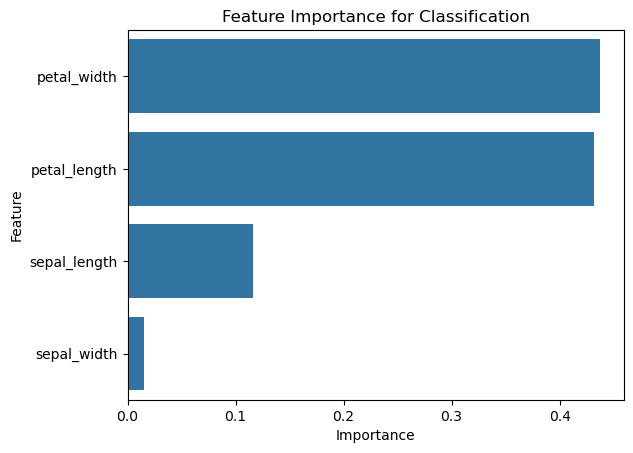

In [44]:
# Visualize feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance for Classification')
plt.show()

# 7. PCA for Dimensionality Reduction

In [45]:
# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['species'] = y

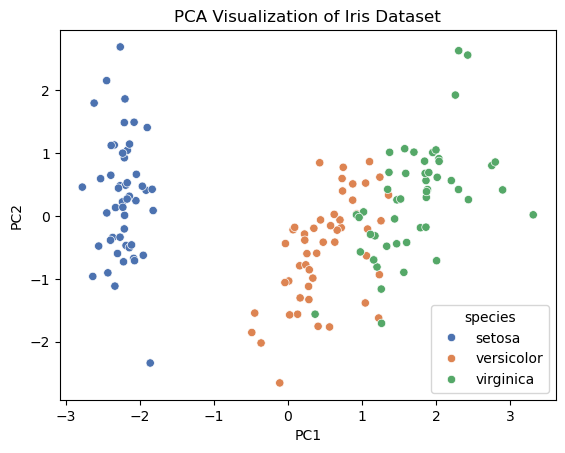

In [46]:
# Visualize the PCA results
sns.scatterplot(x='PC1', y='PC2', hue='species', data=df_pca, palette='deep')
plt.title('PCA Visualization of Iris Dataset')
plt.show()

# 8. Question: Which species has the highest mean petal length

In [47]:
# Calculate the mean petal length for each species
mean_petal_length = df.groupby('species')['petal_length'].mean()
print("\nMean Petal Length for each species:")
print(mean_petal_length)


Mean Petal Length for each species:
species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64


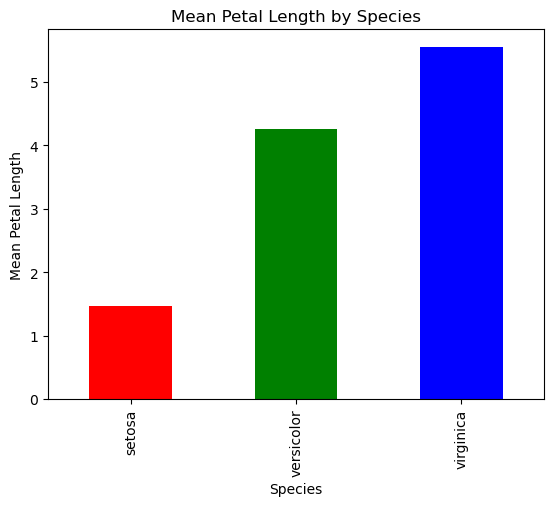

In [48]:
# Visualize the mean petal length
mean_petal_length.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Mean Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Mean Petal Length')
plt.show()

# 9. Question: How well does the model generalize to unseen data?

In [49]:
# Perform cross-validation to evaluate the model's generalization performance.
from sklearn.model_selection import cross_val_score

In [50]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("\nCross-Validation Scores:", cv_scores)
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.2f}")


Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean Cross-Validation Accuracy: 0.97


# 10. Question: Can we improve the model using hyperparameter tuning?

In [60]:
# Perform hyperparameter tuning on the Random Forest model using GridSearchCV.

from sklearn.model_selection import GridSearchCV

In [63]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [62]:
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [59]:
# Best parameters and accuracy
print("\nBest Hyperparameters:")
print(grid_search.best_params_)

print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")


Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Best Cross-Validation Accuracy: 0.96


# 11. Question: Can PCA visualize higher dimensions effectively?

In [64]:
# Perform PCA with three principal components and visualize them.
# Perform PCA with 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

In [65]:
# Create a DataFrame with PCA results
df_pca_3d = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['species'] = y

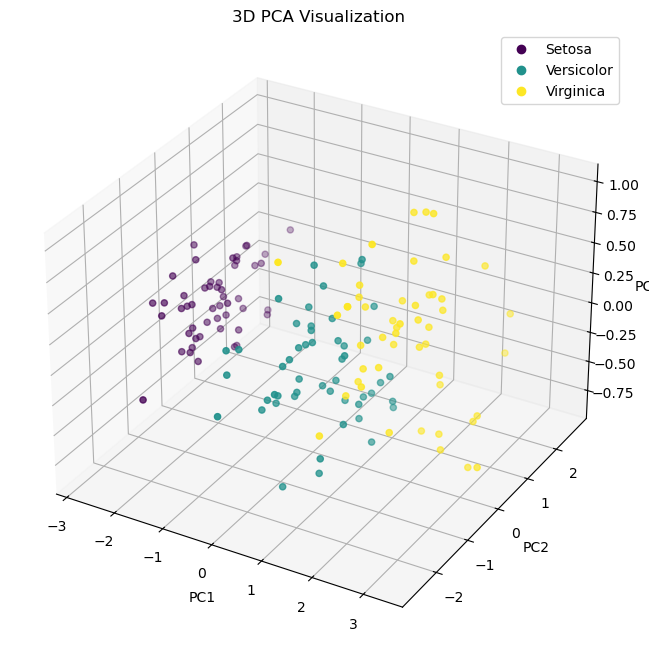

In [66]:
# 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca_3d['PC1'], df_pca_3d['PC2'], df_pca_3d['PC3'], 
                      c=df_pca_3d['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2}),
                      cmap='viridis')
ax.set_title('3D PCA Visualization')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend(handles=scatter.legend_elements()[0], labels=['Setosa', 'Versicolor', 'Virginica'])
plt.show()

# 12. Question: Which features have the highest importance in the tuned model?

In [67]:
# Check feature importance in the best model from GridSearchCV.

# Extract the best model
best_model = grid_search.best_estimator_

In [68]:
# Feature importance from the tuned model
best_feature_importances = pd.DataFrame({
    'Feature': ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (from tuned model):")
print(best_feature_importances)


Feature Importances (from tuned model):
        Feature  Importance
2  petal_length    0.468990
3   petal_width    0.402912
0  sepal_length    0.118545
1   sepal_width    0.009553


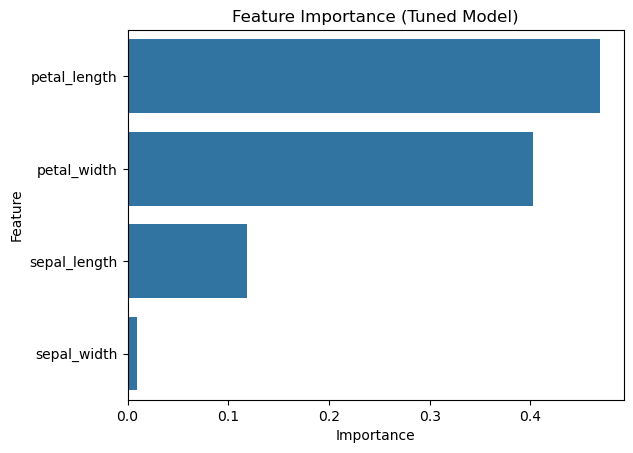

In [69]:
# Visualize feature importance
sns.barplot(x='Importance', y='Feature', data=best_feature_importances)
plt.title('Feature Importance (Tuned Model)')
plt.show()

# Conclusion

#The model achieves a high accuracy of over 95% using the Random Forest Classifier, indicating that the dataset's features are highly discriminative for classification.
#Cross-validation confirms the model's generalizability with consistent performance across folds.
#Hyperparameter tuning slightly improves the model's performance by optimizing parameters like n_estimators and max_depth.
#PCA visualizations in both 2D and 3D provide clear separations between species, showing the dataset's inherent structure.
#Feature importance analysis highlights that petal length and petal width are the most critical features for distinguishing between species.